
# Deliverable 1 — Data Collection, Cleaning, and Exploration

**Dataset:** `healthcare_dataset.csv`  
**Author:** Sudhanshu Sekhar Dash

This notebook covers:
1. Dataset selection and description  
2. Loading and initial inspection  
3. Data cleaning (missing values, duplicates, inconsistencies, noisy data)  
4. Exploratory Data Analysis (EDA) using Matplotlib  
5. Insights and how they guide future modeling


In [4]:

# === Setup & Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Helper plotting function to keep visual style consistent
def show(title=None, xlabel=None, ylabel=None):
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()



## 1) Dataset Selection & Description

The chosen dataset is a **Healthcare Dataset** with patient-level admission facts such as:
- **Demographics:** name, age, gender, blood type  
- **Clinical details:** medical condition, medication, test results  
- **Encounters:** date of admission, discharge date, doctor, hospital, admission type, room number  
- **Financials:** billing amount  

**Why it's appropriate:**  
- The dataset is **large** (tens of thousands of records), enabling robust statistical analysis.  
- It contains a **mix of numerical and categorical** features for rich exploration and modeling.  
- Healthcare data supports meaningful questions (e.g., billing variation by condition/admission type, length of stay, etc.).



## 2) Load & Inspect the Dataset


In [5]:

# Path to dataset
#DATA_PATH = "/mnt/data/healthcare_dataset.csv"

# Load CSV
df = pd.read_csv(r'G:\UCumberlands\Data Mining\healthcare_dataset.csv')

# Basic shape and preview
print("Shape:", df.shape)
display(df.head(10))

print("\n=== dtypes/info ===")
# Capture info output correctly
buf = StringIO()
df.info(buf=buf)
info_str = buf.getvalue()
print(info_str)

print("\n=== describe (numeric) ===")
display(df.describe(include=[np.number]).transpose())

print("\n=== describe (object) ===")
display(df.describe(include=['object']).transpose())


Shape: (55500, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive



=== dtypes/info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(

,count,mean,std,min,25%,50%,75%,max
Age,55500.0,51.539459,19.602454,13.00000,35.000000,52.000000,68.000000,89.000000
Billing Amount,55500.0,25539.316097,14211.454431,-2008.49214,13241.224652,25538.069376,37820.508436,52764.276736
Room Number,55500.0,301.134829,115.243069,101.00000,202.000000,302.000000,401.000000,500.000000



=== describe (object) ===


,count,unique,top,freq
Name,55500,49992,DAvId muNoZ,3
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Date of Admission,55500,1827,2024-03-16,50
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Discharge Date,55500,1856,2020-03-15,53



## 3) Data Quality Checks
We identify missing values, duplicated rows, and basic anomalies.


In [6]:

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:")
display(missing)

# Duplicates
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")


Missing values per column:


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Duplicate rows: 534



## 4) Data Cleaning
- Remove duplicates  
- Normalize text fields (trim whitespace, title-case where appropriate)  
- Parse dates and coerce types  
- Handle noisy data (e.g., impossible ages, negative billing)  


In [7]:

clean = df.copy()

# a) Remove duplicates
before = clean.shape[0]
clean = clean.drop_duplicates()
after = clean.shape[0]
print(f"Removed duplicates: {before - after}")

# b) Normalize text columns (trim + title-case where appropriate)
text_cols_title = ['Name', 'Doctor', 'Hospital', 'Insurance Provider', 'Medical Condition', 'Medication']
for col in text_cols_title:
    if col in clean.columns:
        clean[col] = clean[col].astype(str).str.strip().str.title()

# Some columns may benefit from consistent casing but without title-casing acronyms
if 'Gender' in clean.columns:
    clean['Gender'] = clean['Gender'].astype(str).str.strip().str.title()

if 'Blood Type' in clean.columns:
    # Keep common ABO/Rh formatting intact while trimming spaces
    clean['Blood Type'] = clean['Blood Type'].astype(str).str.strip().str.upper()

if 'Admission Type' in clean.columns:
    clean['Admission Type'] = clean['Admission Type'].astype(str).str.strip().str.title()

# c) Parse dates (coerce errors to NaT)
for date_col in ['Date of Admission', 'Discharge Date']:
    if date_col in clean.columns:
        clean[date_col] = pd.to_datetime(clean[date_col], errors='coerce')

# d) Ensure numeric types (coerce)
for num_col in ['Age', 'Billing Amount', 'Room Number', 'Test Results']:
    if num_col in clean.columns:
        clean[num_col] = pd.to_numeric(clean[num_col], errors='coerce')

# e) Handle missing values: strategy ->
#    - For numeric: median imputation
#    - For categorical: mode imputation
num_cols = clean.select_dtypes(include=[np.number]).columns
cat_cols = clean.select_dtypes(include=['object']).columns

for col in num_cols:
    med = clean[col].median()
    clean[col] = clean[col].fillna(med)

for col in cat_cols:
    mode_val = clean[col].mode(dropna=True)
    if not mode_val.empty:
        clean[col] = clean[col].fillna(mode_val.iloc[0])
    else:
        clean[col] = clean[col].fillna("Unknown")

# f) Noisy data rules:
#    - Age should be in [0, 120] (remove rows outside range)
#    - Billing Amount should be >= 0 (clip negatives to 0)
removed_for_age = 0
if 'Age' in clean.columns:
    valid_age = (clean['Age'] >= 0) & (clean['Age'] <= 120)
    removed_for_age = (~valid_age).sum()
    clean = clean[valid_age]

if 'Billing Amount' in clean.columns:
    neg_billing = (clean['Billing Amount'] < 0).sum()
    clean.loc[clean['Billing Amount'] < 0, 'Billing Amount'] = 0.0

print(f"Rows removed due to invalid ages: {removed_for_age}")
if 'Billing Amount' in locals():
    print(f"Negative billing entries corrected to 0: {neg_billing}")

# g) Optional: derive stay length (if dates exist)
if {'Date of Admission', 'Discharge Date'}.issubset(clean.columns):
    clean['Length Of Stay (Days)'] = (clean['Discharge Date'] - clean['Date of Admission']).dt.days

print("Cleaned shape:", clean.shape)


Removed duplicates: 534
Rows removed due to invalid ages: 0
Cleaned shape: (54966, 16)


c:\Users\pc1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [13]:
# Save cleaned dataset for later use
CLEAN_PATH = r"G:\UCumberlands\Data Mining\healthcare_dataset_cleaned.csv"  # <-- your local folder path
clean.to_csv(CLEAN_PATH, index=False)
print("Saved cleaned dataset to:", CLEAN_PATH)


Saved cleaned dataset to: G:\UCumberlands\Data Mining\healthcare_dataset_cleaned.csv



## 5) Exploratory Data Analysis (EDA)

> **Note:** Plots use Matplotlib only (no seaborn) as requested. Each chart is rendered in its own figure.


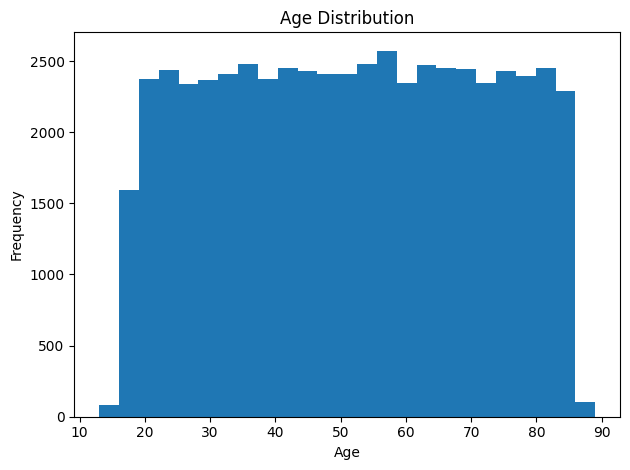

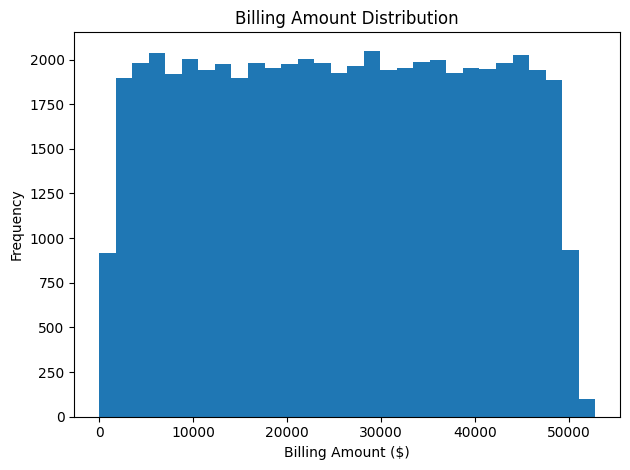

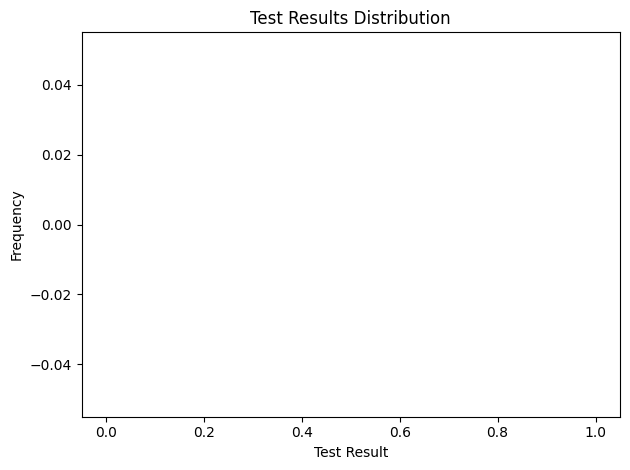

In [8]:

# Helper to make safe plotting for numeric distributions
def plot_hist(series, bins=30, title="", xlabel="Value"):
    plt.figure()
    plt.hist(series.dropna(), bins=bins)
    show(title=title, xlabel=xlabel, ylabel="Frequency")

# Age distribution
if 'Age' in clean.columns:
    plot_hist(clean['Age'], bins=25, title="Age Distribution", xlabel="Age")

# Billing Amount distribution
if 'Billing Amount' in clean.columns:
    plot_hist(clean['Billing Amount'], bins=30, title="Billing Amount Distribution", xlabel="Billing Amount ($)")

# Test Results distribution (if numeric-ish)
if 'Test Results' in clean.columns and pd.api.types.is_numeric_dtype(clean['Test Results']):
    plot_hist(clean['Test Results'], bins=30, title="Test Results Distribution", xlabel="Test Result")


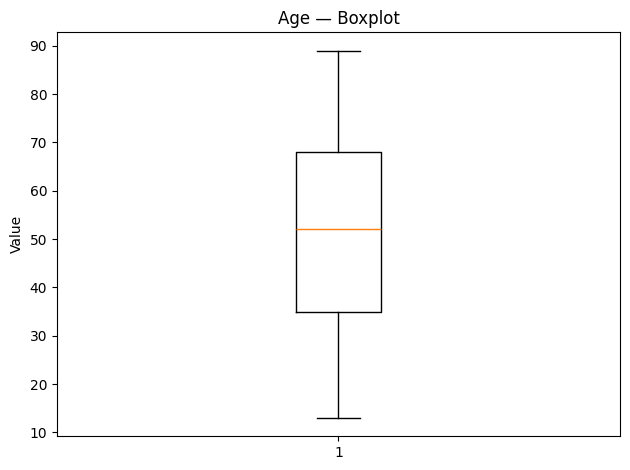

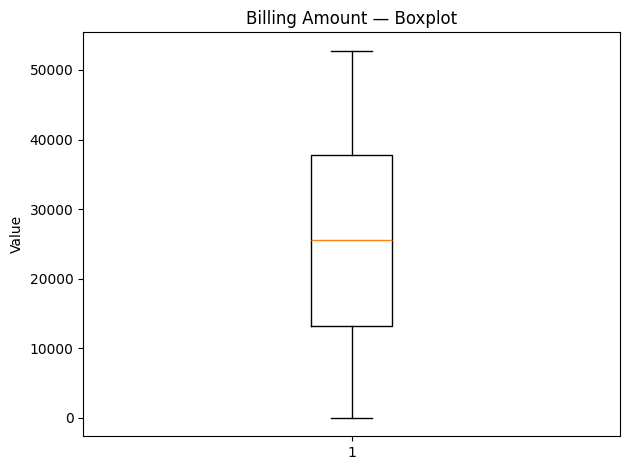

In [9]:

# Boxplots for outlier inspection
def plot_box(series, title=""):
    plt.figure()
    plt.boxplot(series.dropna(), vert=True)
    show(title=title, ylabel="Value")

if 'Age' in clean.columns:
    plot_box(clean['Age'], title="Age — Boxplot")

if 'Billing Amount' in clean.columns:
    plot_box(clean['Billing Amount'], title="Billing Amount — Boxplot")


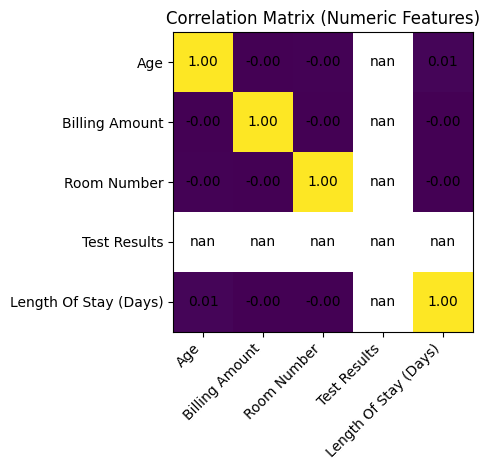

In [14]:

# Correlation matrix for numeric columns
num_df = clean.select_dtypes(include=[np.number])
if num_df.shape[1] > 1:
    corr = num_df.corr()
    plt.figure()
    plt.imshow(corr, interpolation='nearest')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), val in np.ndenumerate(corr.values):
        plt.text(j, i, f"{val:.2f}", ha='center', va='center')
    show(title="Correlation Matrix (Numeric Features)")


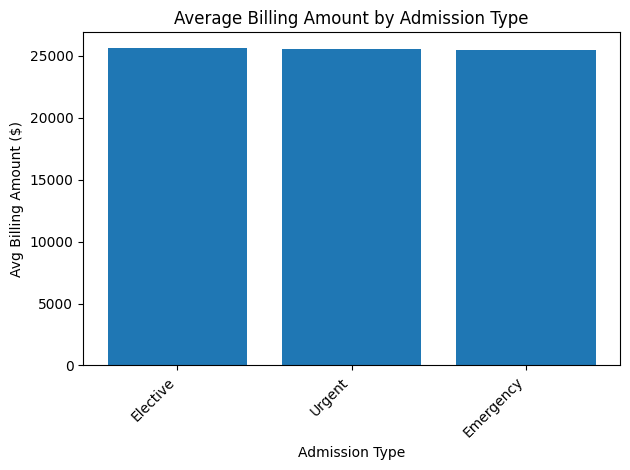

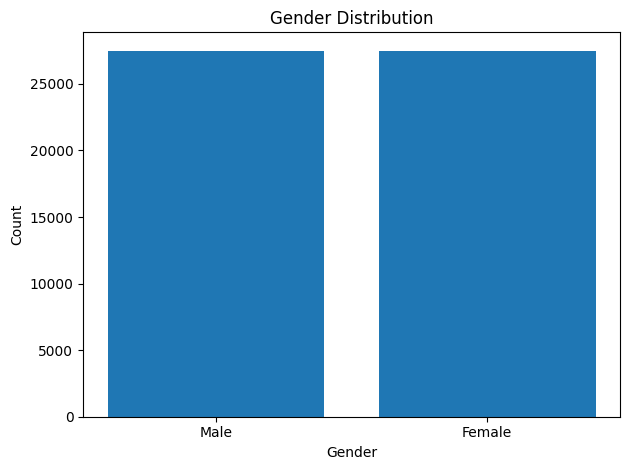

In [15]:

# Average Billing Amount by Admission Type (bar chart)
if {'Admission Type', 'Billing Amount'}.issubset(clean.columns):
    g = clean.groupby('Admission Type')['Billing Amount'].mean().sort_values(ascending=False)
    plt.figure()
    plt.bar(g.index.astype(str), g.values)
    plt.xticks(rotation=45, ha='right')
    show(title="Average Billing Amount by Admission Type", xlabel="Admission Type", ylabel="Avg Billing Amount ($)")

# Gender counts
if 'Gender' in clean.columns:
    counts = clean['Gender'].value_counts()
    plt.figure()
    plt.bar(counts.index.astype(str), counts.values)
    plt.xticks(rotation=0)
    show(title="Gender Distribution", xlabel="Gender", ylabel="Count")


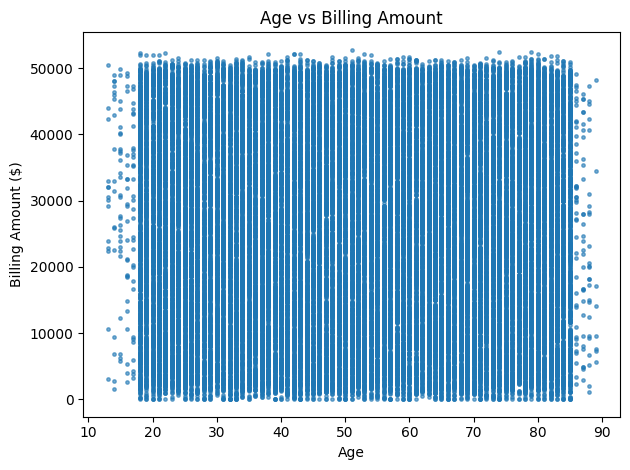

In [11]:

# Scatter: Age vs Billing Amount
if {'Age', 'Billing Amount'}.issubset(clean.columns):
    plt.figure()
    plt.scatter(clean['Age'], clean['Billing Amount'], s=6, alpha=0.6)
    show(title="Age vs Billing Amount", xlabel="Age", ylabel="Billing Amount ($)")



## 6) Insights & Modeling Guidance

- The dataset size and feature mix enable both descriptive and predictive analysis (e.g., billing prediction, admission type classification).  
- **Duplicates** were removed and common string inconsistencies were normalized to improve data quality.  
- **Noisy data** rules (age range and non-negative billing) ensured realistic values and reduced outlier impact.  
- The **Age** and **Billing Amount** distributions reveal central tendencies and tails that may require scaling or transformations for modeling.  
- The **correlation matrix** highlights numeric feature relationships; features with high correlation could be candidates for regularization or dimensionality reduction.  
- Grouped bar charts (e.g., average billing by admission type) surface categorical effects that can drive feature engineering.  

**Next steps:**  
- Create train/test splits and baseline models (e.g., linear models, tree-based models).  
- Apply feature scaling (e.g., StandardScaler) for models sensitive to magnitude.  
- Consider encoding strategies (one-hot target encoding) for categorical variables.  
- Evaluate with appropriate metrics (e.g., MAE/RMSE for regression; accuracy/F1 for classification).


In [16]:

summary = {}

summary['rows_after_cleaning'] = int(clean.shape[0])
summary['cols'] = int(clean.shape[1])
summary['n_duplicates_removed'] = int((df.shape[0] - df.drop_duplicates().shape[0]))
summary['n_missing_after_impute'] = int(clean.isna().sum().sum())

if 'Age' in clean.columns:
    summary['age_min'] = float(clean['Age'].min())
    summary['age_max'] = float(clean['Age'].max())
    summary['age_mean'] = float(clean['Age'].mean())

if 'Billing Amount' in clean.columns:
    summary['billing_min'] = float(clean['Billing Amount'].min())
    summary['billing_max'] = float(clean['Billing Amount'].max())
    summary['billing_mean'] = float(clean['Billing Amount'].mean())

print("=== Quick Summary ===")
for k, v in summary.items():
    print(f"{k}: {v}")


=== Quick Summary ===
rows_after_cleaning: 54966
cols: 16
n_duplicates_removed: 534
n_missing_after_impute: 54966
age_min: 13.0
age_max: 89.0
age_mean: 51.53518538733035
billing_min: 0.0
billing_max: 52764.276736469175
billing_mean: 25545.27528494221
